# Predicting breast cancer using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a  machine learning model capable of predicting whether or not someone has breast cancer based on their medical attributes. 




## Preparing the tools

We are going to use pandas, matplotlib, numpy for data analysis and manipulation

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve


## LOAD DATA

In [2]:
df = pd.read_csv("Breast-data.csv")
df.shape #(rows, columns)

(698, 11)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you working with.

1. What question(s) are you trying to solve ? 
2. What kind of data do we have and how do we treat different types ? 
3. What's missing from the data and how to deal with it ?
4. Where are the outliers and why should we care about them ? [In statistics, an outlier is a data point that differs significantly from other observations] 
5. How can you add, change or remove features to get more out of your data ? 

In [3]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [4]:
df.tail()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,0
694,841769,2,1,1,1,2,1,1,1,1,0
695,888820,5,10,10,3,7,3,8,10,2,1
696,897471,4,8,6,4,3,4,10,6,1,1
697,897471,4,8,8,5,4,5,10,4,1,1


In [5]:
## Finding out how many of each class are there 

df["Class"].value_counts()

0    457
1    241
Name: Class, dtype: int64

<AxesSubplot:>

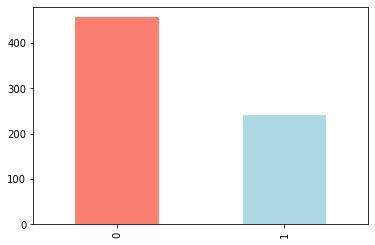

In [6]:
df["Class"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sample Code Number          698 non-null    int64
 1   Clump Thickness             698 non-null    int64
 2   Uniformility of cell size   698 non-null    int64
 3   Uniformility of cell shape  698 non-null    int64
 4   Marginal Adhesion           698 non-null    int64
 5   Single Epithelial Cell      698 non-null    int64
 6   Bare Nuclei                 698 non-null    int64
 7   Bland chromation            698 non-null    int64
 8   Normal Nucleoli             698 non-null    int64
 9   Mitoses                     698 non-null    int64
 10  Class                       698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [8]:
## Are there any missing values ? isna() or 'isnull()' function is used to detect missing values.

df.isna().sum() 

Sample Code Number            0
Clump Thickness               0
Uniformility of cell size     0
Uniformility of cell shape    0
Marginal Adhesion             0
Single Epithelial Cell        0
Bare Nuclei                   0
Bland chromation              0
Normal Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [9]:
df.describe()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.510029,3.438395,2.869628,1.590258,0.345272
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.614579,2.440056,3.055004,1.716162,0.475798
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Breast Cancer Frequency according to Clump Thickness

In [10]:
df.head(8)

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1
5,1018099,1,1,1,1,2,10,3,1,1,0
6,1018561,2,1,2,1,2,1,3,1,1,0
7,1033078,2,1,1,1,2,1,1,1,5,0


In [11]:
df["Clump Thickness"].value_counts()

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [12]:
## Compare Class column with Clump Thickness 

pd.crosstab(df.Class, df["Clump Thickness"])

Clump Thickness,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,142,46,96,66,83,16,2,5,0,1
1,3,4,12,14,46,18,21,41,14,68


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

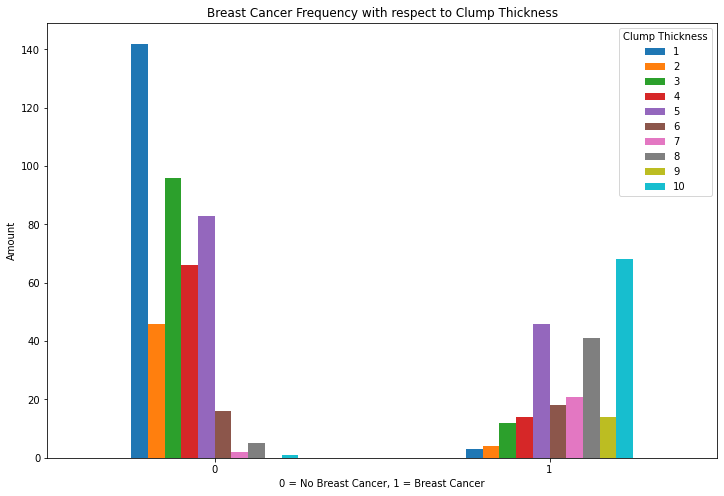

In [13]:
## Create a plot of crosstab

pd.crosstab(df["Class"], df["Clump Thickness"]).plot(kind="bar",
                                                     figsize=(12,8))

plt.title("Breast Cancer Frequency with respect to Clump Thickness")
plt.xlabel("0 = No Breast Cancer, 1 = Breast Cancer")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [14]:
## CREATING ANOTHER FIGURE 

In [15]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [16]:
df["Uniformility of cell shape"].value_counts()

1     352
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformility of cell shape, dtype: int64

In [17]:
df["Marginal Adhesion"].value_counts()

1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

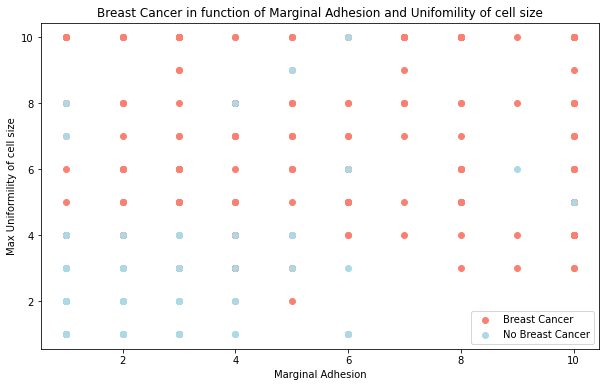

In [18]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Marginal Adhesion"][df["Class"]==1],
            df["Uniformility of cell size"][df["Class"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["Marginal Adhesion"][df["Class"]==0],
            df["Uniformility of cell size"][df["Class"]==0],
            color=["lightblue"]) 

plt.title("Breast Cancer in function of Marginal Adhesion and Unifomility of cell size")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Max Uniformility of cell size")
plt.legend(["Breast Cancer","No Breast Cancer"])


<AxesSubplot:ylabel='Frequency'>

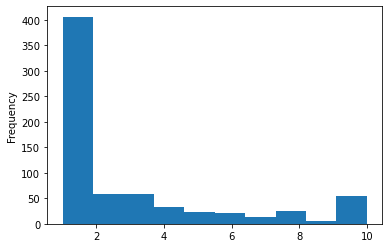

In [19]:
## Checking the distribution of Marginal Adhesion with the histogram

df["Marginal Adhesion"].plot.hist()

In [20]:
df["Normal Nucleoli"].value_counts()

1     442
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [21]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

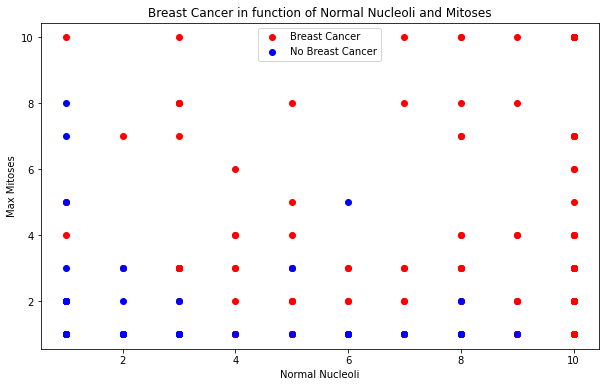

In [22]:
## findind pattern between Normal Nucleoli and Mitoses.


plt.figure(figsize=(10,6))

##Scatter with postive 
plt.scatter(df["Normal Nucleoli"][df["Class"]==1],
            df["Mitoses"][df["Class"]==1],
            color=["red"])

##Scatter with negative
plt.scatter(df["Normal Nucleoli"][df["Class"]==0],
            df["Mitoses"][df["Class"]==0],
            color=["blue"])

plt.title("Breast Cancer in function of Normal Nucleoli and Mitoses")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Max Mitoses")
plt.legend(["Breast Cancer","No Breast Cancer"])


In [23]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [24]:
## Make correlation matrix 

df.corr()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
Sample Code Number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.095440,-0.060082,-0.052188,-0.034961,-0.065038
Clump Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.588496,0.558511,0.536176,0.350176,0.703666
Uniformility of cell size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686563,0.755824,0.722699,0.458548,0.795052
Uniformility of cell shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707773,0.736066,0.719272,0.438756,0.787350
Marginal Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.665965,0.666759,0.603132,0.417476,0.681827
Single Epithelial Cell,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.582017,0.616108,0.628704,0.478975,0.663563
Bare Nuclei,-0.095440,0.588496,0.686563,0.707773,0.665965,0.582017,1.000000,0.674422,0.575108,0.341118,0.785082
Bland chromation,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674422,1.000000,0.665914,0.344118,0.728309
Normal Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.575108,0.665914,1.000000,0.428185,0.699236
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.341118,0.344118,0.428185,1.000000,0.412466


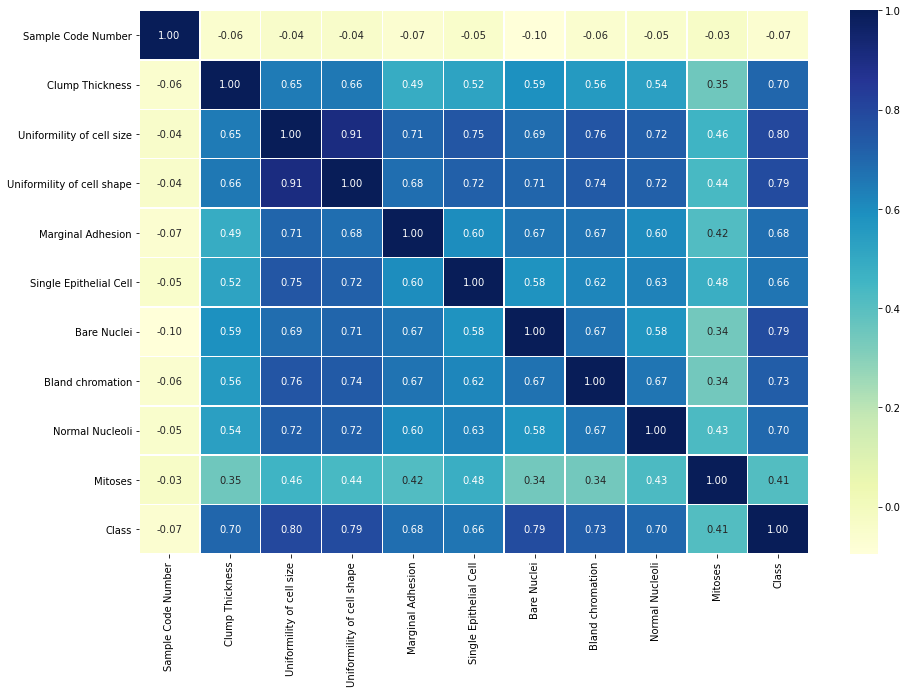

In [25]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

In [26]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

<AxesSubplot:xlabel='Class'>

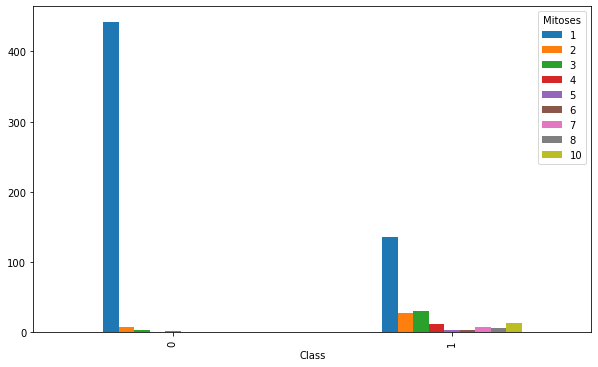

In [27]:
pd.crosstab(df["Class"],df["Mitoses"]).plot(kind="bar",
                                            figsize=(10,6))

## MODELLING

In [28]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [29]:
# Split the data into X and y
X = df.drop("Class", axis=1)  ## axis = 0 (for index) and axis=1 (for column)
y = df["Class"]

In [30]:
X

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
0,1002945,5,4,4,5,7,10,3,2,1
1,1015425,3,1,1,1,2,2,3,1,1
2,1016277,6,8,8,1,3,4,3,7,1
3,1017023,4,1,1,3,2,1,3,1,1
4,1017122,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1
694,841769,2,1,1,1,2,1,1,1,1
695,888820,5,10,10,3,7,3,8,10,2
696,897471,4,8,6,4,3,4,10,6,1


In [31]:
y

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [32]:
# Split data into train and  test sets
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [33]:
X_train

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
82,1147044,3,1,1,1,2,2,7,1,1
51,1110102,10,3,6,2,3,5,4,10,2
220,1225799,10,6,4,3,10,10,9,10,1
559,1321942,5,1,1,1,2,1,3,1,1
544,1197527,5,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
71,1124651,1,3,3,2,2,1,7,2,1
106,1170420,1,6,8,10,8,10,5,7,1
270,411453,5,1,1,1,2,1,3,1,1
435,1295186,10,10,10,1,6,1,2,8,1


In [34]:
y_train

82     0
51     1
220    1
559    0
544    0
      ..
71     0
106    1
270    1
435    1
102    1
Name: Class, Length: 558, dtype: int64


Now we have got our data split into training and test sets, it's time to build a machine learning model.

We will train it(find a patterns) on the training sets. 

And we will test it(using the patterns) on the test sets.

We are going to try 3 different machine learning models:
1. Logistice Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Naive Bayes


In [49]:
# Put models into dictionary 

models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Naive Bayes":GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [50]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [51]:
model_scores

{'Logistic Regression': 0.6428571428571429,
 'KNN': 0.65,
 'Random Forest': 0.9571428571428572,
 'Naive Bayes': 0.8714285714285714}

## Model Comparison

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Naive Bayes')])

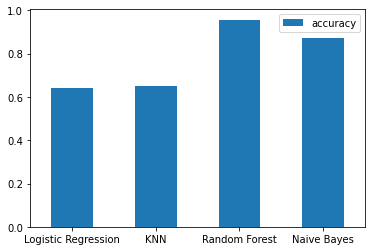

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=0)


Now we've got a baseline model...  and we know a model's first prediction aren't always what we should based our next steps off. What should we do ?

Let's look at the following:
1. Hyperparameter tuning  # part of all machine learning models
2. Features importance    # part with all
3. Confusion Matrix       #from 3 to 10 concerned with Classification model 
4. Cross-Validation
5. Precision 
6. Recall
7. F1 score
8. Classification report 
9. ROC curve 
10. Area under the curve (AUC) 

## Hyperparameter Tuning(manually)

In [54]:
#Let's tune KNN

train_scores = []
test_scores = []

# Creates a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [55]:
train_scores

[1.0,
 0.8100358422939068,
 0.7849462365591398,
 0.7365591397849462,
 0.7311827956989247,
 0.7078853046594982,
 0.7060931899641577,
 0.7060931899641577,
 0.7096774193548387,
 0.7060931899641577,
 0.6935483870967742,
 0.6917562724014337,
 0.6935483870967742,
 0.6953405017921147,
 0.6971326164874552,
 0.7060931899641577,
 0.7025089605734767,
 0.6953405017921147,
 0.6935483870967742,
 0.6917562724014337]

In [56]:
test_scores

[0.6285714285714286,
 0.6571428571428571,
 0.6285714285714286,
 0.6714285714285714,
 0.65,
 0.6428571428571429,
 0.5928571428571429,
 0.6357142857142857,
 0.6071428571428571,
 0.6214285714285714,
 0.6571428571428571,
 0.6571428571428571,
 0.6357142857142857,
 0.6428571428571429,
 0.6357142857142857,
 0.6357142857142857,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286]

Maximum KNN score on the test data: 67.14%


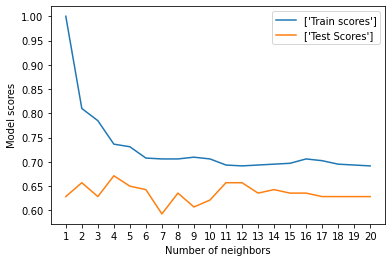

In [67]:
plt.plot(neighbors, train_scores, label=["Train scores"])
plt.plot(neighbors, test_scores, label=["Test Scores"])

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We will be tuning 

    1. LogisticeRegression()
    2. RandomForestClassifier()
    3. GaussianNB() 
    
   using RandomizedSearchCV